# 1 Initialisation

## 1.1 Imports

In [1]:
# Librairies pour le traitement des données
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

# Librairies pour la visualisation de graphiques
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #Définir le style par défaut pour les graphiques

from my_functions.common_functions import *
from my_functions.uni_bi_variate_functions import *

low_memory=False # faible mémoire vive (RAM)

## 1.3 Récupération du Data Set

In [2]:
df = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', low_memory=low_memory) # , parse_dates=['created_datetime','last_modified_datetime'], infer_datetime_format=True)
# df = df.head(1000)

## Structure du data set

In [3]:
df.shape

(320772, 162)

In [4]:
print(df.columns.tolist())

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'nutrition_grade_fr', 'pnns_groups_1', 

In [5]:
df.head(1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,12.163636,31.925000,49.790389,2.862111,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.0761

Le data set contient :
	- 320772 lignes et 162 colonnes.
	- 39608589 valeurs manquantes, ce qui représente 76.22 % du data set.


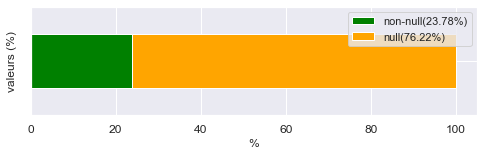

In [7]:
verifier_taille(df, False)


In [8]:
afficher_echantillon(df)

Voici un sous-échantillon aléatoire :


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
4727,0011110904157,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489143295,2017-03-10T10:54:55Z,1489143295,2017-03-10T10:54:55Z,Lite Coconut Milk,NaN,NaN,NaN,NaN,"Kroger, The Kroger Co.","kroger,the-kroger-co",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Water, coconut cream, xanthan gum.",NaN,NaN,NaN,NaN,NaN,80 ml (0.333 cup),NaN,1.0,[ water -> en:water ] [ coconut-cream -> en...,en:e415,E415 - Gomme xanthane,0.0,NaN,NaN,0.0,NaN,NaN,NaN,c,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,314.0,NaN,7.50,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.25,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,1.25,NaN,NaN,NaN,0.03048,0.012,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.00045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN
84211,0073410026205,http://world-fr.openfoodfacts.org/produit/0073...,usda-ndb-import,1489133796,2017-03-10T08:16:36Z,1489133796,2017-03-10T08:16:36Z,100% Whole Wheat Bread,NaN,NaN,NaN,NaN,Oroweat,oroweat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,e

# Cleanning

In [9]:
nans = nan_cols(df, 99.99)
nans

,Column,NaN_Count,NaN_Percent,Not_NaN_Count,Not_NaN_Percent
0,cities,320749,99.992830,23,0.007170
1,allergens_fr,320753,99.994077,19,0.005923
2,no_nutriments,320772,100.000000,0,0.000000
3,ingredients_from_palm_oil,320772,100.000000,0,0.000000
4,ingredients_that_may_be_from_palm_oil,320772,100.000000,0,0.000000
5,nutrition_grade_uk,320772,100.000000,0,0.000000
6,butyric-acid_100g,320772,100.000000,0,0.000000
7,caproic-acid_100g,320772,100.000000,0,0.000000
8,caprylic-acid_100g,320771,99.999688,1,0.000312
9,capric-acid_100g,320770,99.999377,2,0.000623


In [10]:
df = df.drop(columns=nans['Column'])
df.shape

(320772, 120)

In [11]:
len(df[df['code'].isnull()])

23

In [12]:
df = df[df['code'].notnull()]

In [13]:
# Transformation des colonnes dates
dates_t = ['created_t', 'last_modified_t']
for date in dates_t:
    df[date] = pd.to_datetime(df[date], unit='s')

In [14]:
# Suppression de colonnes non pertinentes
df = df.drop(columns=['created_datetime', 'last_modified_datetime'])

In [15]:
cols = colsOfType(df, ['float64','float32'])
outlier_cols = [col for col in cols if (df[col].max()>100 or df[col].min()<0) and col not in ['energy_100g', 'energy-from-fat_100g', 'carbon-footprint_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']]
print(outlier_cols)

# histo_distribution(df[outlier_cols], horizontal=False)

['fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'trans-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fructose_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'folates_100g', 'potassium_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g', 'magnesium_100g', 'copper_100g', 'selenium_100g']


In [16]:
df[df['ph_100g']==0]

,code,url,creator,created_t,last_modified_t,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,fructose_100g,lactose_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,iodine_100g,caffeine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
276432,5400141038330,http://world-fr.openfoodfacts.org/produit/5400...,teolemon,2014-08-10 13:12:09,2017-01-31 10:36:36,"Eau Minérale Naturelle, source &quot;Oiselle&q...",Eau minérale naturelle,"1,5 L","Bouteille,Plastique","bouteille,plastique","Boni,Colruyt","boni,colruyt","Boissons,Eaux,Eaux minérales,Boissons non sucrées","en:beverages,en:waters,en:mineral-waters,en:no...","Boissons,Eaux,Eaux minérales,Boissons non sucrées",France,france,"France,59230,Saint-Amand-les-Eaux","france,59230,saint-amand-les-eaux",Point Vert,en:green-dot,Point Vert,NaN,NaN,NaN,NaN,"France,Belgique",Spar,"Belgique,France","en:belgium,en:france","Belgique,France",Eau minérale naturelle source Oiselle.,NaN,NaN,NaN,NaN,1 L,0.0,[ eau-minerale-naturelle-source-oiselle -> fr...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,Beverages,Non-sugared beverages,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:waters,Eaux,http://fr.openfoodfacts.org/images/products/54...,http://fr.openfoodfacts.org/images/products/54...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df['ph_100g'] = df['ph_100g'].replace(0,7)

In [18]:
cols = colsOfType(df, ['float64','float32'])
cols = sorted([col for col in cols if '_100g' in col and col not in ['carbon-footprint_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g','energy_100g', 'energy-from-fat_100g']])
print(cols)

['alcohol_100g', 'alpha-linolenic-acid_100g', 'beta-carotene_100g', 'bicarbonate_100g', 'biotin_100g', 'caffeine_100g', 'calcium_100g', 'carbohydrates_100g', 'chloride_100g', 'cholesterol_100g', 'cocoa_100g', 'collagen-meat-protein-ratio_100g', 'copper_100g', 'docosahexaenoic-acid_100g', 'eicosapentaenoic-acid_100g', 'fat_100g', 'fiber_100g', 'fluoride_100g', 'folates_100g', 'fructose_100g', 'fruits-vegetables-nuts_100g', 'iodine_100g', 'iron_100g', 'lactose_100g', 'linoleic-acid_100g', 'magnesium_100g', 'manganese_100g', 'monounsaturated-fat_100g', 'omega-3-fat_100g', 'omega-6-fat_100g', 'pantothenic-acid_100g', 'ph_100g', 'phosphorus_100g', 'polyols_100g', 'polyunsaturated-fat_100g', 'potassium_100g', 'proteins_100g', 'salt_100g', 'saturated-fat_100g', 'selenium_100g', 'silica_100g', 'sodium_100g', 'starch_100g', 'sucrose_100g', 'sugars_100g', 'trans-fat_100g', 'vitamin-a_100g', 'vitamin-b12_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'vitamin-c

In [19]:
df_copy = df.copy()
for col in cols:
    # df = df_copy[((df_copy[col]>=0) & (df_copy[col]<=100)) | (df_copy[col].isnull())]
    df[col] = df[col].map(lambda x: np.nan if x<0 or x>100 else x)

In [20]:
nan_cols(df, 99.98)

,Column,NaN_Count,NaN_Percent,Not_NaN_Count,Not_NaN_Percent
0,eicosapentaenoic-acid_100g,320716,99.989712,33,0.010288
1,docosahexaenoic-acid_100g,320694,99.982853,55,0.017147
2,fructose_100g,320712,99.988465,37,0.011535
3,beta-carotene_100g,320715,99.989400,34,0.010600
4,silica_100g,320711,99.988153,38,0.011847
5,ph_100g,320700,99.984723,49,0.015277


In [21]:
len(df[df['carbon-footprint_100g'].notnull()])

268

In [22]:
df[cols].describe()

,alcohol_100g,alpha-linolenic-acid_100g,beta-carotene_100g,bicarbonate_100g,biotin_100g,caffeine_100g,calcium_100g,carbohydrates_100g,chloride_100g,cholesterol_100g,cocoa_100g,collagen-meat-protein-ratio_100g,copper_100g,docosahexaenoic-acid_100g,eicosapentaenoic-acid_100g,fat_100g,fiber_100g,fluoride_100g,folates_100g,fructose_100g,fruits-vegetables-nuts_100g,iodine_100g,iron_100g,lactose_100g,linoleic-acid_100g,magnesium_100g,manganese_100g,monounsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,pantothenic-acid_100g,ph_100g,phosphorus_100g,polyols_100g,polyunsaturated-fat_100g,potassium_100g,proteins_100g,salt_100g,saturated-fat_100g,selenium_100g,silica_100g,sodium_100g,starch_100g,sucrose_100g,sugars_100g,trans-fat_100g,vitamin-a_100g,vitamin-b12_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-b6_100g,vitamin-b9_100g,vitamin-c_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-pp_100g,zinc_100g
count,4133.000000,186.000000,34.000000,81.000000,307.000000,78.000000,141040.000000,243569.000000,158.000000,144090.000000,948.000000,165.000000,2105.000000,55.000000,33.000000,243887.000000,200881.000000,79.000000,3039.000000,37.000000,3036.000000,259.000000,140461.000000,262.000000,149.000000,6247.000000,1620.000000,22822.000000,841.000000,188.000000,2460.000000,49.000000,5840.000000,414.000000,22859.000000,24746.000000,259902.000000,255352.000000,229551.000000,1167.000000,38.000000,255429.000000,266.000000,72.000000,244952.000000,143289.000000,137553.000000,5.300000e+03,11153.000000,10815.000000,6784.000000,5240.000000,140863.000000,7057.000000,1340.000000,918.000000,11719.000000,3929.000000
mean,7.838105,2.250285,0.518715,0.119052,0.019628,1.594563,0.102023,32.055323,0.092638,0.020071,49.547785,15.412121,0.029083,0.742291,3.617545,12.725256,2.832473,0.012161,0.053283,23.867568,31.458587,0.000427,0.003653,6.354084,3.823819,0.146546,0.003014,10.401099,3.182103,16.229144,0.058991,6.568555,0.274337,49.790389,6.312493,0.324840,7.079837,1.588497,5.125925,0.003129,0.013123,0.647145,31.925000,11.841667,15.985449,0.067172,0.000397,8.938696e-05,0.311168,0.259007,0.023378,0.006898,0.014563,0.000008,0.056705,0.034219,0.014782,0.007950
std,10.959671,7.971418,2.561144,0.189486,0.342434,6.475588,0.585288,29.140680,0.149725,0.358062,18.757932,3.753028,0.901919,1.639335,14.927170,17.503695,4.588272,0.067952,1.449425,27.659367,31.967918,0.001285,0.214409,14.386132,6.494183,1.124804,0.028036,16.688625,5.607988,17.512632,1.462162,1.821947,1.148853,33.212338,10.832591,1.065723,8.156621,6.242531,7.913684,0.104548,0.040660,2.656343,24.704434,13.993859,21.165362,0.945020,0.073279,5.514738e-03,1.951304,1.277026,1.206822,0.335163,0.461423,0.000360,0.694039,1.031398,0.270975,0.080953
min,0.000000,0.000000,0.000000,0.000006,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,6.000000,8.000000,0.000000,0.041000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.068750,0.001225,0.017320,0.000008,0.015500,0.000000,6.000000,0.001368,0.000000,32.000000,12.000000,0.000177,0.126000,0.200000,0.000000,0.000000,0.000018,0.000042,0.900000,0.000000,0.000015,0.000000,0.000000,0.437000,0.021000,0.000000,0.000000,0.600000,1.850000,0.000417,6.600000,0.094000,18.350000,0.000000,0.107000,0.700000,0.063500,0.000000,0.000005,0.001500,0.025000,4.500000,2.100000,1.300000,0.000000,0.000000,7.200000e-07,0.004000,0.002720,0.000255,0.000030,0.000000,0.000001,0.001800,0.000006,0.003077,0.001150
50%,5.000000,0.117500,0.005261,0.036000,0.000013,0.021000,0.035000,20.600000,0.014600,0.000000,50.000000,15.000000,0.000417,0.494000,0.533000,5.000000,1.500000,0.000060,0.000114,8.000000,23.000000,0.000034,0.001010,0.100000,0

In [23]:
afficher_echantillon(df)[['product_name','generic_name','ingredients_text','traces','traces_tags', 'nutrition_grade_fr', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'additives_n', 'additives', 'additives_tags', 'main_category', 'main_category_fr', 'categories', 'categories_tags']]

Voici un sous-échantillon aléatoire :


,product_name,generic_name,ingredients_text,traces,traces_tags,nutrition_grade_fr,nutrition-score-fr_100g,nutrition-score-uk_100g,additives_n,additives,additives_tags,main_category,main_category_fr,categories,categories_tags
188619,Sveltesse Recettes Dessert 0%,Yaourt maigre aux fruits et morceaux de biscui...,NaN,Phénylalanine,fr:phenylalanine,a,-1.0,-1.0,NaN,NaN,NaN,en:fruit-yogurts,Yaourts aux fruits,"Yaourts allégés,Yaourts aux fruits","en:dairies,en:yogurts,en:fruit-yogurts,en:low-..."
275056,Barre Amande Abricot et Yaourt,Barre aux fruits secs,NaN,"cacahuètes,Soja,Graines de sésame","en:peanuts,en:sesame-seeds,en:soybeans",d,13.0,13.0,NaN,NaN,NaN,en:sugary-snacks,Snacks sucrés,"Snacks sucrés,Barres,Barres de céréales,Barres...","en:sugary-snacks,en:bars,en:cereal-bars,fr:bar..."


# Travail sur les Catégories

In [24]:
working_category = 'main_category_fr' # 'categories_tags' #'main_category' # 'categories_fr' 'categories_tags'
df[working_category] = df[working_category].replace('', np.nan)
df = df[df[working_category].notnull()]

In [25]:
df[working_category] = df[working_category].map(lambda categorie : str(categorie).split(':')[-1].lower().replace('é','e') if categorie!=np.nan else '')

for j in range(2):
    allCategories = df[working_category].unique()
    allCategories =  [categorie for categorie in allCategories if categorie[:-1] not in allCategories and categorie[:-2] not in allCategories and categorie[:-3] not in allCategories]
    allCategories = sorted(list(set(allCategories)))

    for i in range (3,0,-1):
        df[working_category] = df[working_category].map(lambda categorie : categorie.split('-')[0] if categorie[:-i] not in allCategories else categorie[:-i].split('-')[0])

df[working_category] = df[working_category].replace('', np.nan)
df = df[df[working_category].notnull()]

In [26]:
# print(allCategories)

In [27]:
# print(sorted([categorie for categorie in allCategories if '-' not in categorie and ' ' not in categorie]))

In [28]:
afficher_echantillon(df)[[working_category]]

Voici un sous-échantillon aléatoire :


,main_category_fr
278704,epicerie
190102,quenelles


In [29]:
main_category = df[working_category].unique().tolist()
print(len(main_category), main_category[:10])

1656 ['filet', 'legumes frais', 'pâtisseries', 'pain', 'boulange', 'aliments et boissons à base de vegetaux', 'root', 'sable', 'plats prepares', 'volailles']


# Missing Values

## Sampling Data

In [30]:
cols = colsOfType(df, ['float64','float32'])

# Random Sampling
data = df[df['nutrition-score-fr_100g'].notnull()][cols]
data = data[~data.isnull().all(axis=1)]

data_size = len(data)
sample_size = int(data_size*0.5) # min(data_size, 20000) #int(data_size*0.07)
print('Original data size:', data_size, 'Sample data size:', sample_size)

sampled_data = data.copy()
stop = False
while not stop :
    sample = np.random.randint(data_size, size=sample_size)
    sampled_data = data.iloc[sample]
    stop = len(nan_cols(sampled_data, 100)) == 0

sampled_data, scaler = MinMax_Scaled(sampled_data, frame=True, return_scaler=True)

Original data size: 57780 Sample data size: 28890


## Simple Imputation (mean)

In [31]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean') 
mean_imputer_transfom = mean_imputer.fit_transform(sampled_data)
mean_imputed_data = pd.DataFrame(scaler.inverse_transform(mean_imputer_transfom), columns = sampled_data.columns, index=sampled_data.index)

afficher_echantillon(mean_imputed_data)

Voici un sous-échantillon aléatoire :


,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,fructose_100g,lactose_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,iodine_100g,caffeine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
248953,4.0,0.0,0.0,416.0,582.217476,1.5,0.3,15.513458,8.551725,2.969267,1.265731,5.538824,0.508733,16.405778,3.304606,0.227584,0.041612,0.9,0.5,92.8,30.15,8.491124,33.333475,46.679546,2.833747,20.3,1.85,0.728346,0.603297,0.000313,0.002562,0.000005,0.096182,0.00002,0.043542,0.002875,0.001985,0.033142,0.01716,0.008295,0.00002,0.000002,0.000026,0.013965,0.051588,0.028939,0.495999,0.185193,0.288831,0.286959,0.026951,0.307081,0.04418,0.001864,0.00332,0.003458,0.000531,0.000539,0.027968,6.6,37.662458,15.480769,48.067161,481.828846,4.0,4.0
205182,0.0,0.0,0.0,2657.0,582.217476,55.7,4.2,15.513458,8.551725,2.969267,1.265731,5.538824,0.508733,16.405778,3.304606,0.227584,0.041612,5.8,4.7,92.8,30.15,8.491124,33.333475,46.679546,2.833747,25.4,0.04,0.015748,0.603297,0.000313,0.002562,0.000005,0.096182,0.00002,0.043542,0.002875,0.001985,0.033142,0.01716,0.008295,0.00002,0.000002,0.000026,0.013965,0.051588,0.028939,0.495999,0.185193,0.288831,0.286959,0.026951,0.307081,0.04418,0.001864,0.00332,0.003458,0.000531,0.000539,0.027968,6.6,37.662458,15.480769,48.067161,481.828846,2.0,2.0


## Iterative Imputation

In [32]:
# To use the experimental IterativeImputer, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

iter_imputer = IterativeImputer() #random_state=0
iter_imputer_transfom = iter_imputer.fit_transform(sampled_data)
iter_imputed_data = pd.DataFrame(scaler.inverse_transform(iter_imputer_transfom), columns = sampled_data.columns, index=sampled_data.index)

afficher_echantillon(iter_imputed_data)

Voici un sous-échantillon aléatoire :


C:\Python39\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,fructose_100g,lactose_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,iodine_100g,caffeine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
209413,0.0,0.0,0.0,71.0,19.964255,0.3,0.0,9.507185,-10.445785,2.756244,1.227313,2.384977,0.484386,16.430964,3.134944,0.197082,0.005466,0.7,0.2,92.8,26.667222,2.061451,33.332328,46.677839,1.300000,2.1,0.47,0.185039,0.602951,0.000279,0.002996,0.000005,0.096029,0.000025,0.048865,0.002868,0.001979,0.032771,0.017174,0.008251,0.00002,0.000001,0.000026,0.014528,0.097668,-0.452914,0.498877,0.123249,0.020834,0.085413,0.151730,0.308149,0.050795,0.001775,0.002930,0.000647,0.000355,0.000501,0.028079,6.6,40.176202,15.483671,48.069865,481.772477,-5.0,-5.0
198581,4.0,0.0,0.0,422.0,230.286671,5.6,2.5,10.251701,-7.898139,2.894255,1.245591,2.647962,0.527814,16.411561,3.083711,0.203073,-0.001639,3.6,1.4,92.8,28.400336,-0.341397,33.333427,46.675140,1.105981,7.9,1.19,0.468504,0.601715,0.000299,0.002916,0.000004,0.096209,0.000023,0.068814,0.002868,0.001985,0.032878,0.017183,0.008284,0.00002,0.000001,0.000026,0.014396,0.099087,-0.448113,0.489958,0.169218,0.289243,0.176880,0.162401,0.308242,0.044229,0.001780,0.003083,0.000434,0.000573,0.000499,0.027937,6.6,34.808230,15.483189,48.082377,481.761858,4.0,4.0


## K-NN Imputation

In [33]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=10, weights='distance')
knn_imputer_transfom = knn_imputer.fit_transform(sampled_data)
knn_imputed_data = pd.DataFrame(scaler.inverse_transform(knn_imputer_transfom), columns = sampled_data.columns, index=sampled_data.index)

afficher_echantillon(knn_imputed_data)

Voici un sous-échantillon aléatoire :


,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,fructose_100g,lactose_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,iodine_100g,caffeine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
227788,7.0,0.0,0.0,1129.0,333.107735,14.0,6.8,9.381390,2.665766,1.507395,2.655093,0.677978,0.914199,1.496777,2.763188,0.065552,0.013453,31.0,28.0,92.8,30.604353,0.066603,21.742128,21.489507,0.963443,4.4,0.23,0.090551,1.190009,0.000068,0.002486,4.855127e-06,0.007608,0.000015,0.006902,0.000648,0.000677,0.009968,0.001036,0.010438,0.00002,2.509277e-06,0.000045,0.003557,0.050036,0.031615,0.394805,0.142361,0.119904,0.307240,0.002087,0.118903,0.004994,0.000665,0.001655,0.000174,0.000022,0.000553,0.028078,6.6,43.559156,16.155448,56.664371,463.078198,16.0,16.0
275904,1.0,0.0,0.0,183.0,55.065334,1.8,0.8,0.492182,1.404538,0.062627,0.135416,0.529939,0.356628,0.812330,0.369310,0.025454,0.004214,0.5,0.5,92.8,29.922974,0.120570,2.364364,4.849494,0.500000,6.6,1.00,0.393701,0.000000,0.000094,0.002913,7.594908e-07,0.001692,0.000006,0.004148,0.022099,0.004120,0.003177,0.000399,0.000037,0.00002,5.443599e-07,0.000020,0.001375,0.005890,0.032532,0.015912,0.003835,0.105963,0.098804,0.000517,0.002216,0.000842,0.003163,0.000024,0.000220,0.000019,0.000027,0.027702,6.6,24.343113,13.411141,43.219767,70.478778,0.0,0.0


# Analyse Exploratoire

In [34]:
# histo_distribution(knn_imputed_data, horizontal=False)

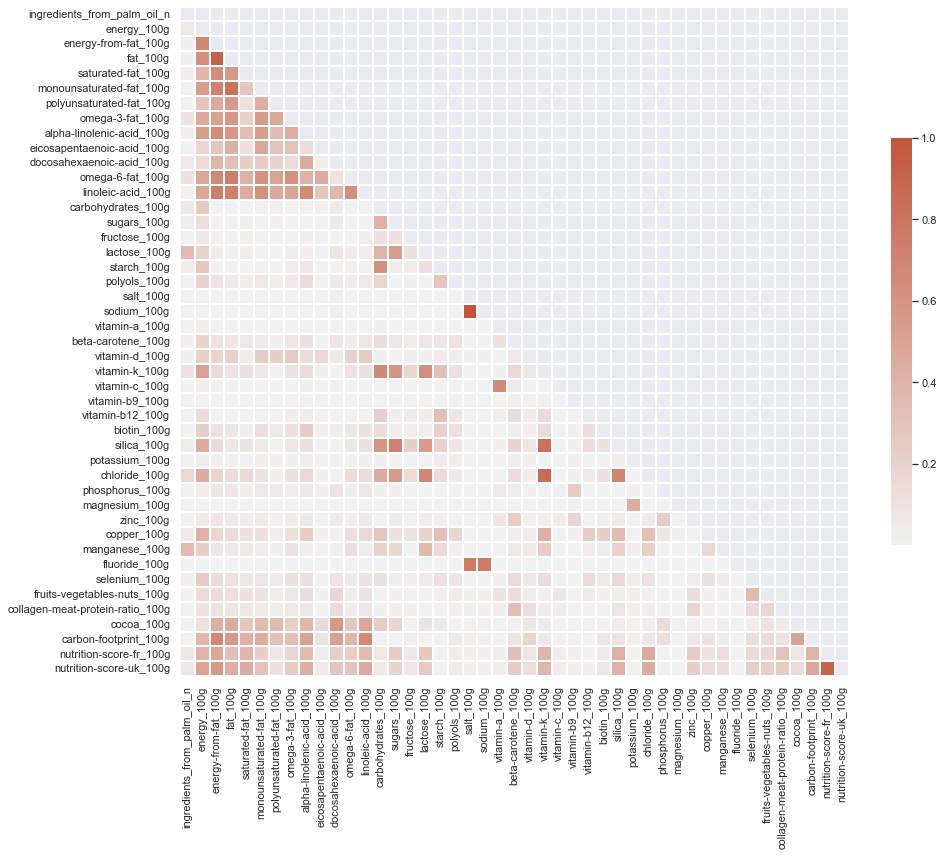

In [100]:
correlation_matrix(knn_imputed_data, 0.2)

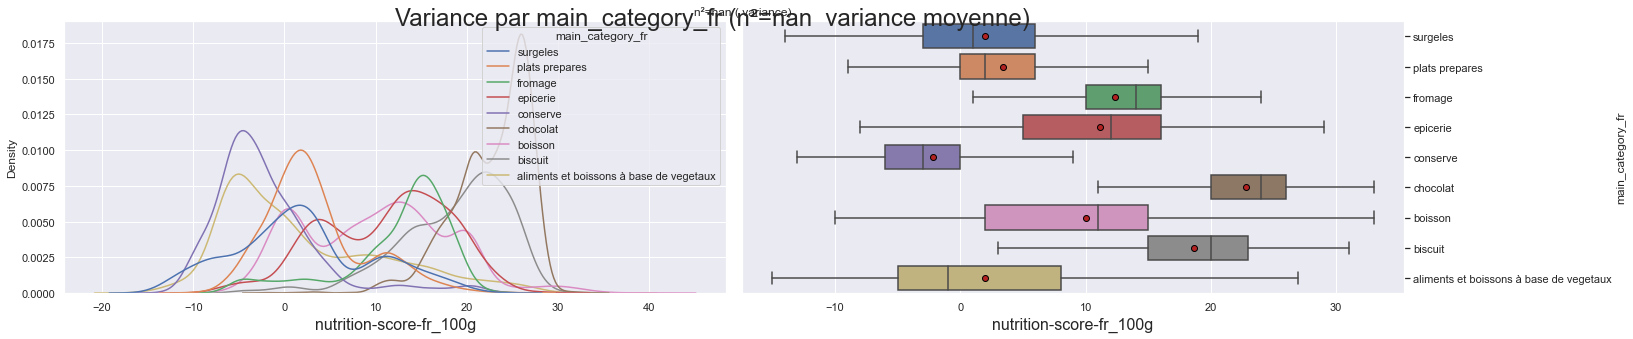

In [36]:
Q = working_category #qualitative
# print(df[Q].unique().tolist()[:20])
sub_Q = ['aliments et boissons à base de vegetaux','boisson','chocolat','conserve','biscuit','epicerie','plats prepares','surgeles','fromage'] 
# sub_Q = [q for q in df[Q].unique().tolist()[:20] if q != np.nan and  q != '']
ANOVA(df[df[Q].isin(sub_Q)], Q, ['nutrition-score-fr_100g'])

In [37]:
# print(df['countries_fr'].sort_values().unique().tolist()[:100])

# Q = 'countries_fr' #qualitative
# sub_Q = df[Q].unique().tolist()[:20]
# ANOVA(df[df[Q].isin(sub_Q)], Q, ['nutrition-score-fr_100g', 'carbon-footprint_100g'])

# Multi-variate with Mean Imputed Data

In [38]:
X = mean_imputed_data # knn_imputed_data.copy() # mean_imputed_data # iter_imputed_data
X, scaler = MinMax_Scaled(X, frame=True, return_scaler=True)
X['nutrition-score-fr_100g'] = knn_imputed_data['nutrition-score-fr_100g']

## PCA

In [39]:
from my_functions.pca_functions import *

63 cols: ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'sucrose_100g', 'fructose_100g', 'lactose_100g', 'starch_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g', 'iro

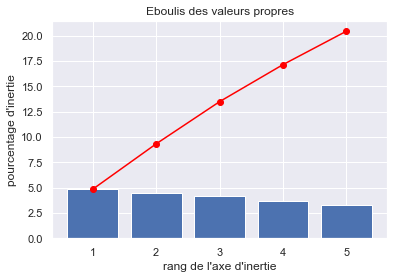

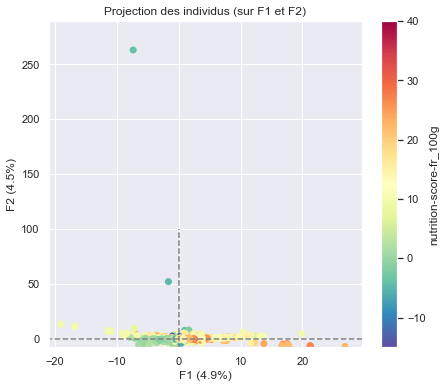

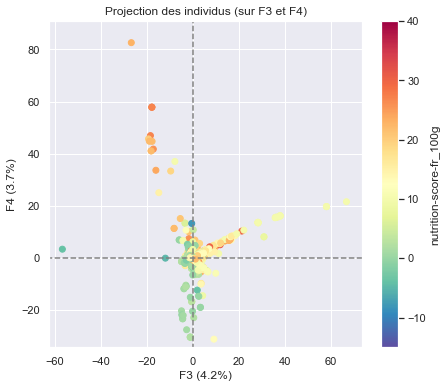

In [40]:
cols = colsOfType(df, ['float64','float32'])[:-3]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 5, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

6 cols: ['carbohydrates_100g', 'sugars_100g', 'sucrose_100g', 'fructose_100g', 'lactose_100g', 'starch_100g']


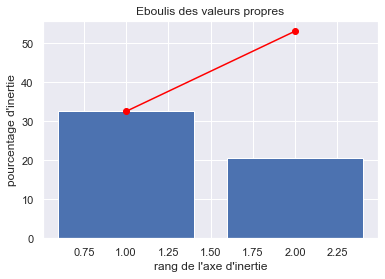

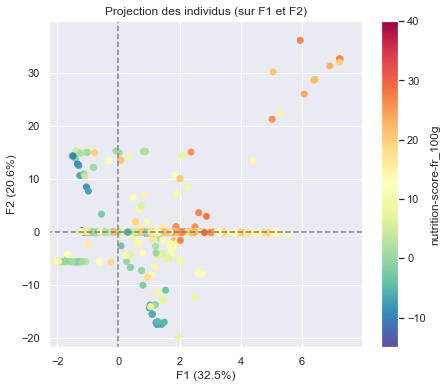

In [41]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'ose' in col or col in ['carbohydrates_100g', 'starch_100g', 'sugars_100g']]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = PCA_Compression(X, pcs, cols, 'glucids')

13 cols: ['energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'trans-fat_100g', 'pantothenic-acid_100g']


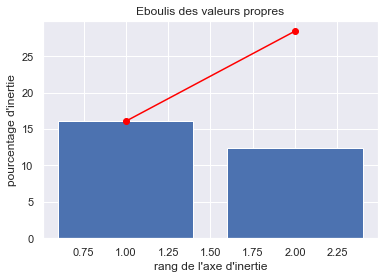

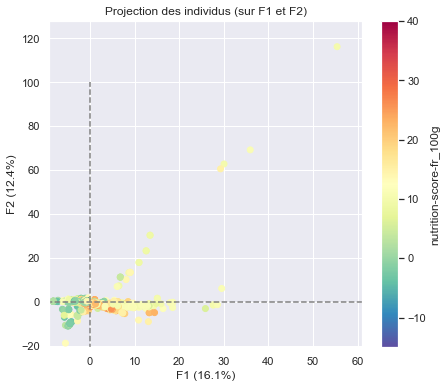

In [42]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'fat' in col or 'acid' in col]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)
compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'fatcids')], axis=1)

4 cols: ['salt_100g', 'sodium_100g', 'fluoride_100g', 'iodine_100g']


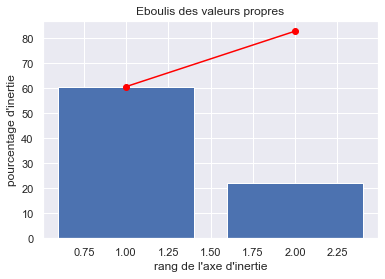

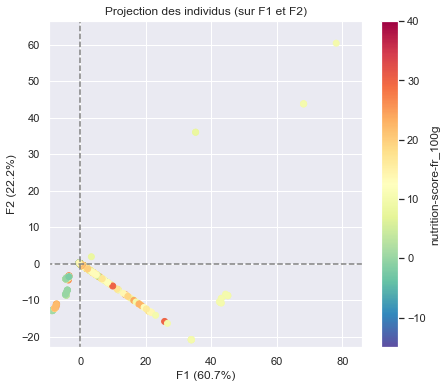

In [43]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if col in ['fluoride_100g', 'iodine_100g', 'salt_100g', 'sodium_100g']]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)
compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'salts')], axis=1)

11 cols: ['vitamin-a_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'vitamin-b12_100g']


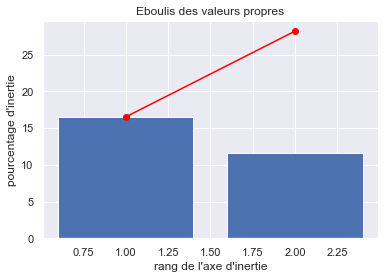

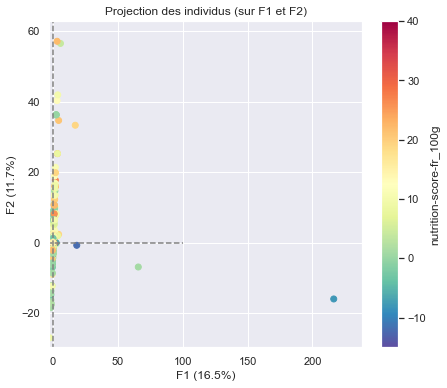

In [44]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'vitamin' in col]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'vitamins')], axis=1)

4 cols: ['potassium_100g', 'calcium_100g', 'magnesium_100g', 'selenium_100g']


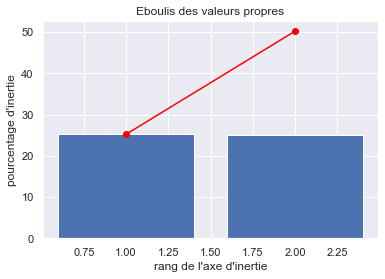

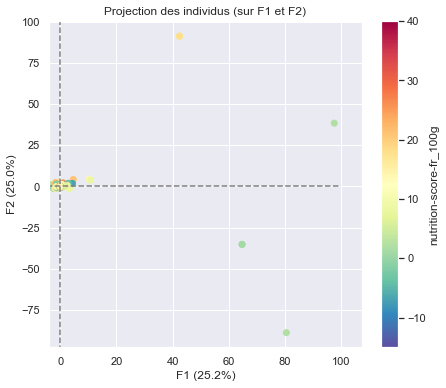

In [45]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'ium' in col and col!='sodium_100g']
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'minerals')], axis=1)

27 cols: ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'cholesterol_100g', 'carbohydrates_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'alcohol_100g', 'beta-carotene_100g', 'folates_100g', 'biotin_100g', 'silica_100g', 'bicarbonate_100g', 'chloride_100g', 'phosphorus_100g', 'iron_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'caffeine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g', 'cocoa_100g']


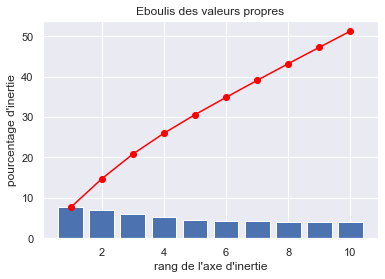

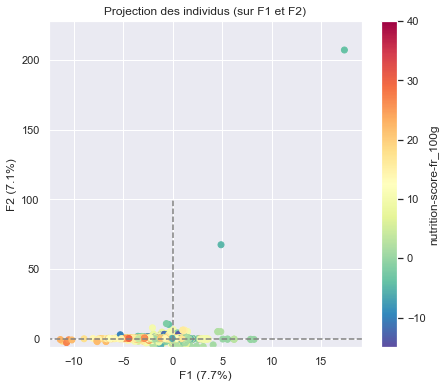

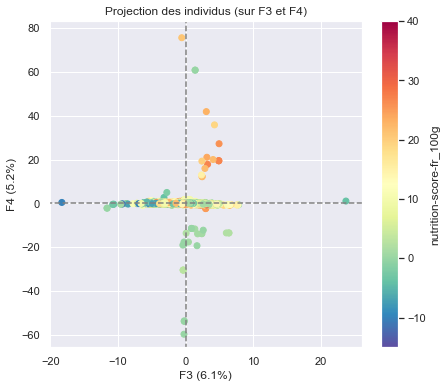

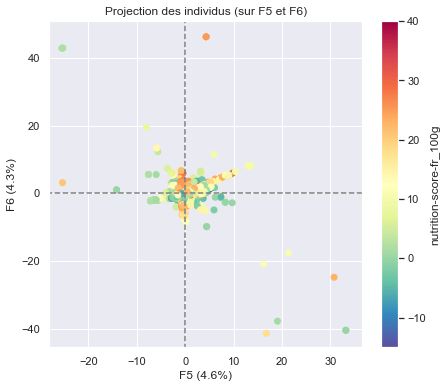

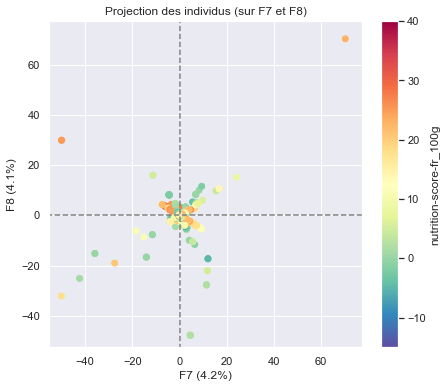

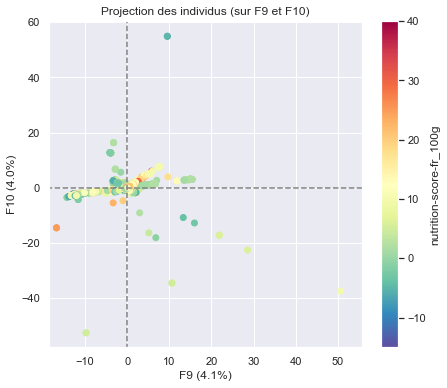

In [46]:
# Choix des colonnes à réduire
cols = colsOfType(df, ['float64','float32'])[:-3]
cols = [col for col in cols if 'fat' not in col and 'ose' not in col and 'acid' not in col and 'vitamin' not in col and 'ium' not in col and col not in ['fluoride_100g', 'iodine_100g', 'salt_100g''carbohydrates_100g', 'starch_100g', 'sugars_100g']]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 10, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols)], axis=1)

In [47]:
compressed = pd.concat([compressed, X['nutrition-score-fr_100g']], axis=1)

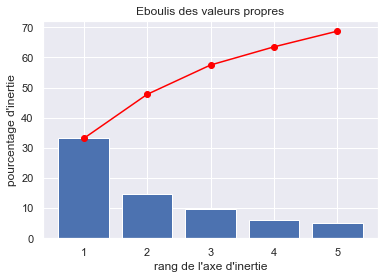

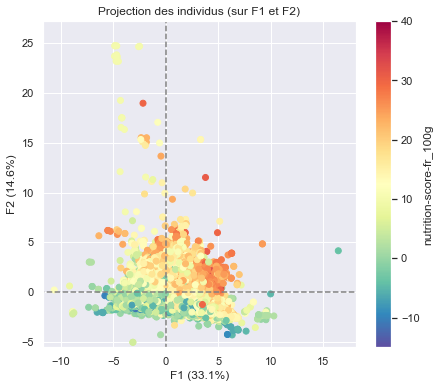

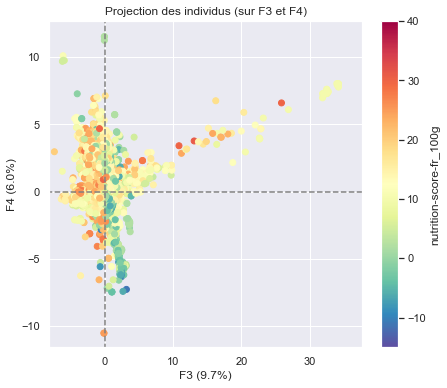

In [48]:
pcs = PCA(compressed, 5, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

In [49]:
compressed = pd.concat([PCA_Compression(X, pcs), X['nutrition-score-fr_100g']], axis=1)
compressed

,comp1,comp2,comp3,comp4,comp5,nutrition-score-fr_100g
178164,0.038884,0.164826,0.098349,-0.091838,0.213107,-2.0
259933,0.050246,0.036634,0.038310,-0.075939,0.267341,22.0
246305,-0.072466,0.120347,0.000327,-0.206395,0.269744,19.0
188492,0.081260,0.150283,0.039316,-0.001061,0.225447,6.0
260155,-0.051687,0.185362,-0.016854,0.096573,0.230180,2.0
...,...,...,...,...,...,...
313972,0.064443,0.007575,0.023002,-0.227589,0.266811,21.0
233709,0.056551,0.176811,0.126268,-0.148478,0.213206,-6.0
241945,-0.064781,0.087018,-0.031722,0.062212,0.237652,17.0
180300,0.017727,-0.063650,-0.019147,-0.097723,0.239070,22.0


In [50]:
# histo_distribution(compressed, horizontal=False)

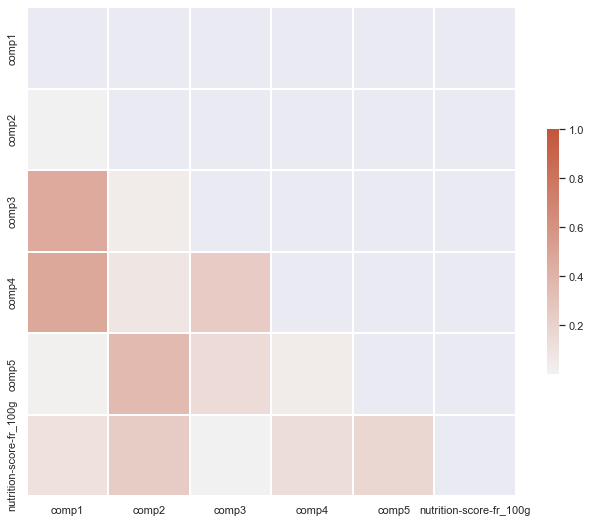

In [51]:
correlation_matrix(compressed)

## K-Means

In [52]:
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités
data = compressed
n_clust = int(len(data)*0.2)
print('Original data size:', len(data), 'nb_clusters:', n_clust)

# préparation des données pour le clustering
X = data.values
X_scaled = Std_Scaled(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km_X = km.fit(X_scaled)

centroids = km_X.cluster_centers_ 

Original data size: 28890 nb_clusters: 5778


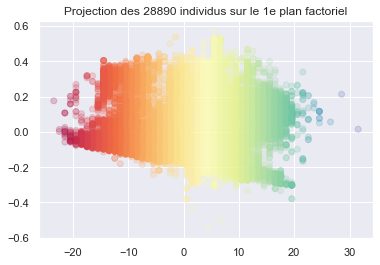

In [53]:
# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=X[:, -1], cmap = sns.color_palette('Spectral', as_cmap=True), alpha=.2) # c=clusters.astype(np.float)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

## K-NN

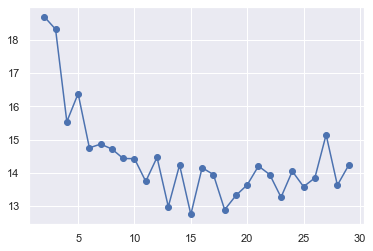

Best k=15, MSE=12.75%


In [54]:
from my_functions.knn_functions import *

data = pd.DataFrame(centroids, columns=compressed.columns)

mean_imputed_best_k, mean_imputed_min_error, mean_imputed_best_knn, mean_imputed_errors, mean_imputed_ks = best_knn(data, Y='nutrition-score-fr_100g', repeat_factor=100)
print('Best k=' + str(mean_imputed_best_k) + ', MSE=' + str(round(mean_imputed_min_error,2)) + '%')

# Multi-variate with Iterative Imputed Data

In [55]:
X = iter_imputed_data # knn_imputed_data.copy() # mean_imputed_data # iter_imputed_data
X, scaler = MinMax_Scaled(X, frame=True, return_scaler=True)
X['nutrition-score-fr_100g'] = knn_imputed_data['nutrition-score-fr_100g']

## PCA

In [56]:
from my_functions.pca_functions import *

63 cols: ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'sucrose_100g', 'fructose_100g', 'lactose_100g', 'starch_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g', 'iro

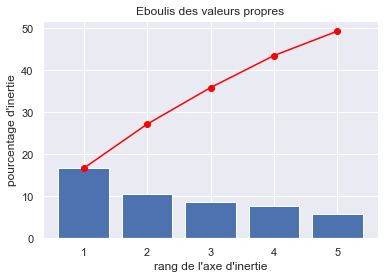

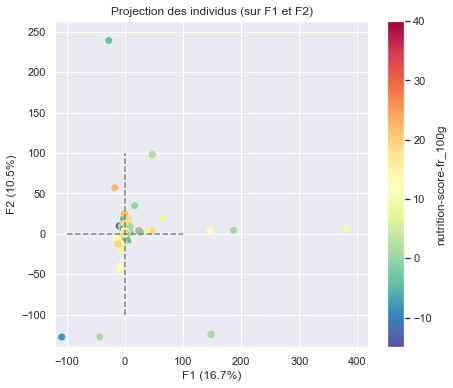

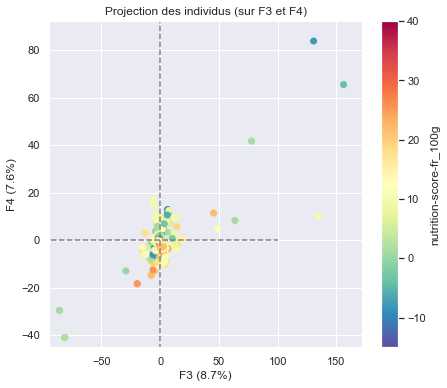

In [57]:
cols = colsOfType(df, ['float64','float32'])[:-3]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 5, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

6 cols: ['carbohydrates_100g', 'sugars_100g', 'sucrose_100g', 'fructose_100g', 'lactose_100g', 'starch_100g']


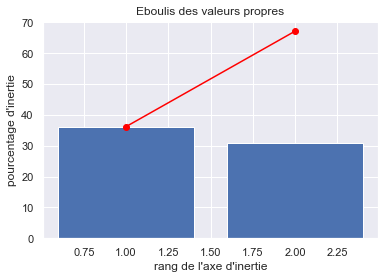

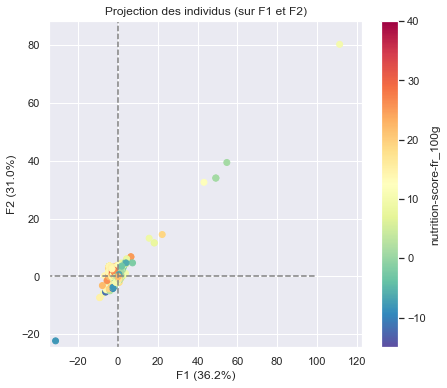

In [58]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'ose' in col or col in ['carbohydrates_100g', 'starch_100g', 'sugars_100g']]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = PCA_Compression(X, pcs, cols, 'glucids')

13 cols: ['energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'trans-fat_100g', 'pantothenic-acid_100g']


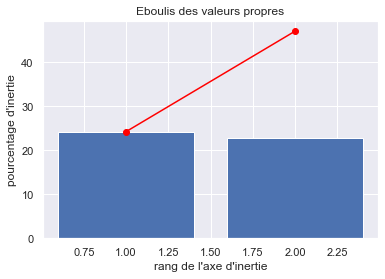

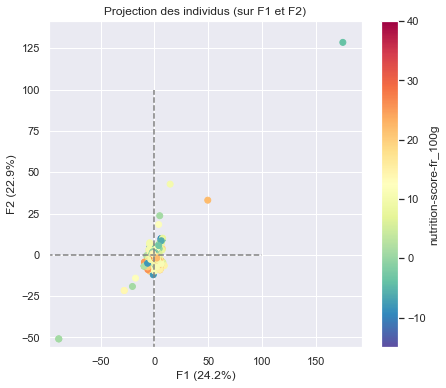

In [59]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'fat' in col or 'acid' in col]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)
compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'fatcids')], axis=1)

4 cols: ['salt_100g', 'sodium_100g', 'fluoride_100g', 'iodine_100g']


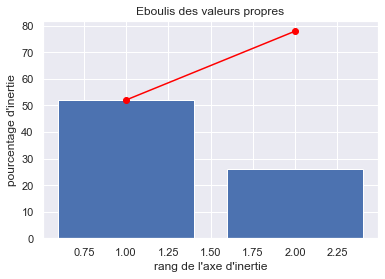

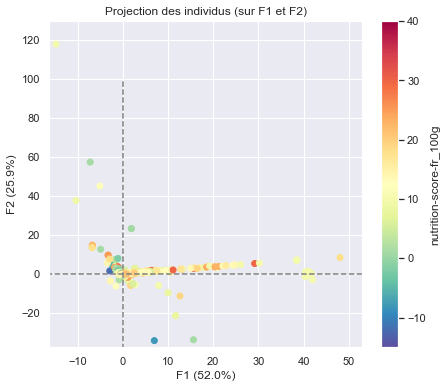

In [60]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if col in ['fluoride_100g', 'iodine_100g', 'salt_100g', 'sodium_100g']]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)
compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'salts')], axis=1)

11 cols: ['vitamin-a_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'vitamin-b12_100g']


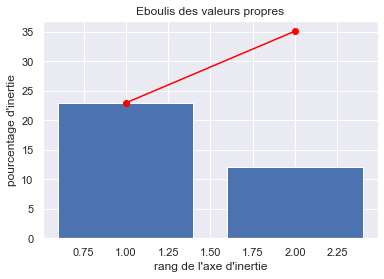

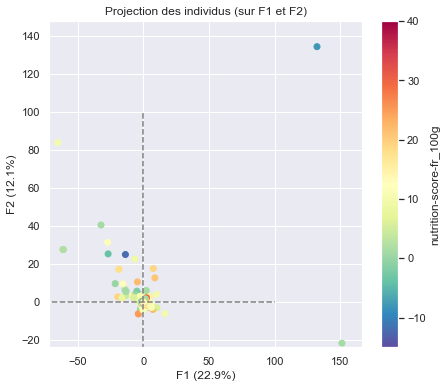

In [61]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'vitamin' in col]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'vitamins')], axis=1)

4 cols: ['potassium_100g', 'calcium_100g', 'magnesium_100g', 'selenium_100g']


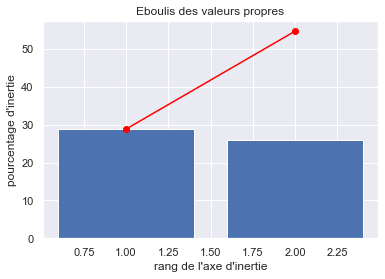

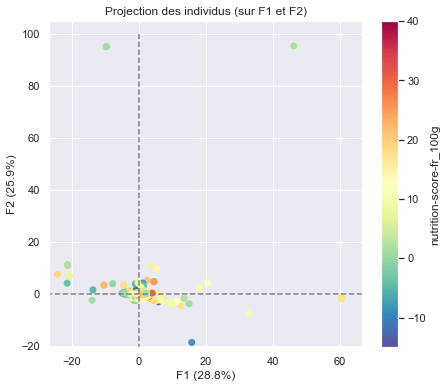

In [62]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'ium' in col and col!='sodium_100g']
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'minerals')], axis=1)

27 cols: ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'cholesterol_100g', 'carbohydrates_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'alcohol_100g', 'beta-carotene_100g', 'folates_100g', 'biotin_100g', 'silica_100g', 'bicarbonate_100g', 'chloride_100g', 'phosphorus_100g', 'iron_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'caffeine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g', 'cocoa_100g']


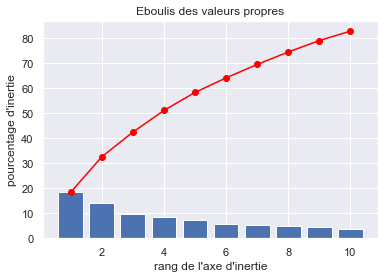

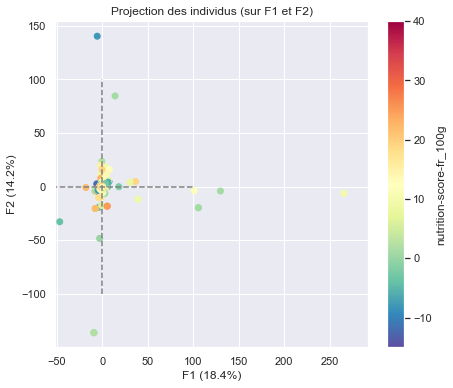

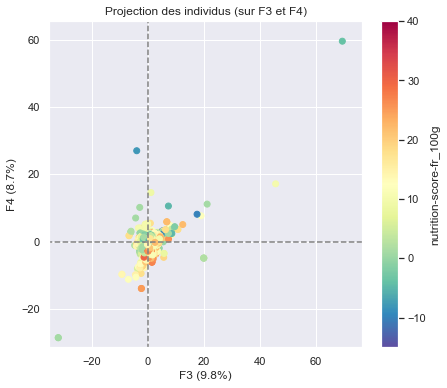

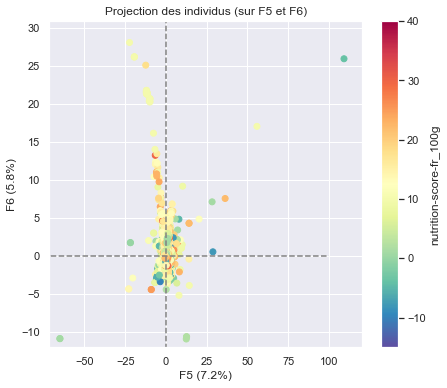

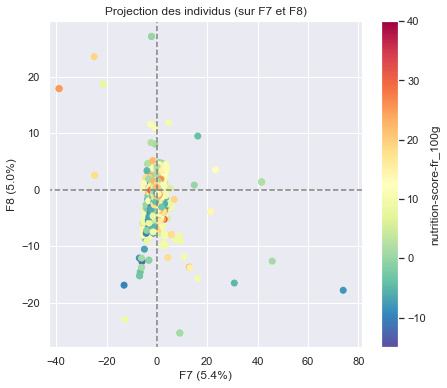

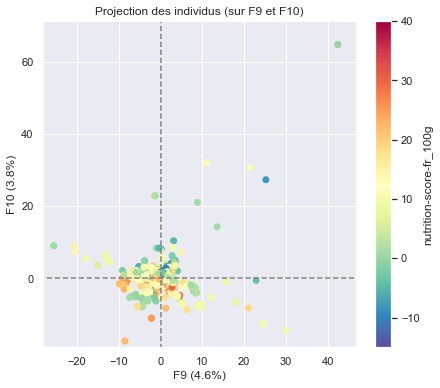

In [63]:
# Choix des colonnes à réduire
cols = colsOfType(df, ['float64','float32'])[:-3]
cols = [col for col in cols if 'fat' not in col and 'ose' not in col and 'acid' not in col and 'vitamin' not in col and 'ium' not in col and col not in ['fluoride_100g', 'iodine_100g', 'salt_100g''carbohydrates_100g', 'starch_100g', 'sugars_100g']]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 10, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols)], axis=1)

In [64]:
compressed = pd.concat([compressed, X['nutrition-score-fr_100g']], axis=1)

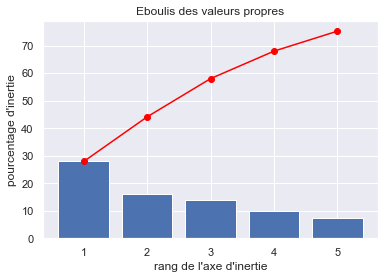

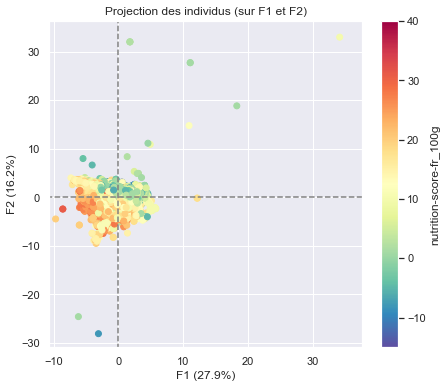

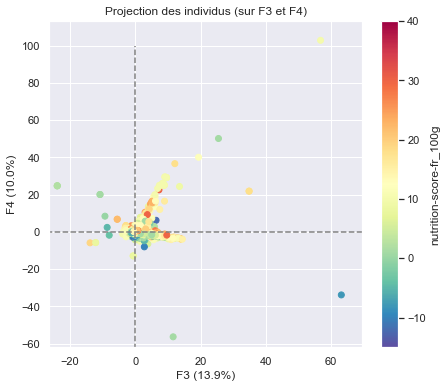

In [65]:
pcs = PCA(compressed, 5, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

In [66]:
compressed = pd.concat([PCA_Compression(X, pcs), X['nutrition-score-fr_100g']], axis=1)
compressed

,comp1,comp2,comp3,comp4,comp5,nutrition-score-fr_100g
178164,0.022226,-0.512969,0.753496,0.980553,0.558689,-2.0
259933,-0.030978,-0.407537,0.825197,1.028814,0.417427,22.0
246305,-0.062520,-0.413021,0.838112,1.019824,0.478195,19.0
188492,-0.037895,-0.503910,0.759493,0.991332,0.531450,6.0
260155,-0.062030,-0.507500,0.799349,0.992682,0.527185,2.0
...,...,...,...,...,...,...
313972,0.072921,-0.491991,0.819929,1.038589,0.464768,21.0
233709,0.032565,-0.519756,0.743699,0.967732,0.566891,-6.0
241945,-0.035392,-0.461847,0.825914,1.028746,0.479917,17.0
180300,0.044173,-0.388935,0.832699,1.107253,0.419785,22.0


In [67]:
# histo_distribution(compressed, horizontal=False)

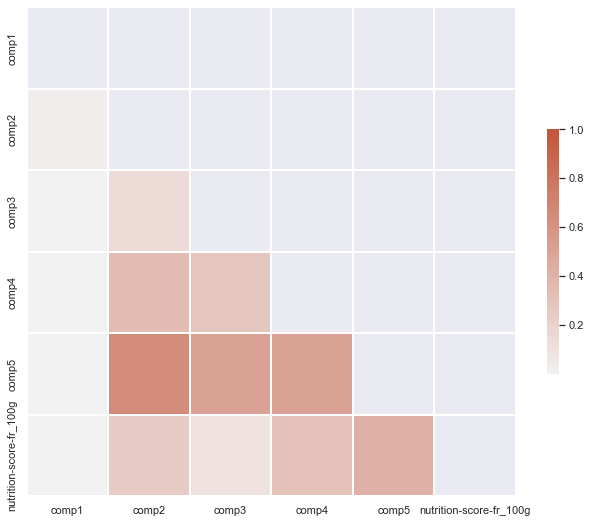

In [68]:
correlation_matrix(compressed)

## K-Means

In [69]:
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités
data = compressed
n_clust = int(len(data)*0.2)
print('Original data size:', len(data), 'nb_clusters:', n_clust)

# préparation des données pour le clustering
X = data.values
X_scaled = Std_Scaled(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km_X = km.fit(X_scaled)

centroids = km_X.cluster_centers_ 

Original data size: 28890 nb_clusters: 5778


4.723372693725437


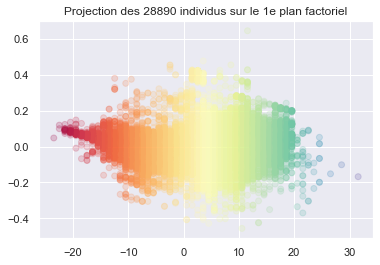

In [70]:
# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X)
print(pca.score(X))
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=X[:, -1], cmap = sns.color_palette('Spectral', as_cmap=True), alpha=.2) # c=clusters.astype(np.float)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

## K-NN

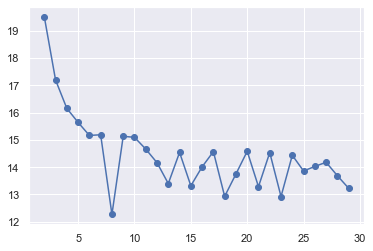

Best k=8, MSE=12.27%


In [71]:
from my_functions.knn_functions import *

data = pd.DataFrame(centroids, columns=compressed.columns)

iter_imputed_best_k, iter_imputed_min_error, iter_imputed_best_knn, iter_imputed_errors, iter_imputed_ks = best_knn(data, Y='nutrition-score-fr_100g', repeat_factor=100)
print('Best k=' + str(iter_imputed_best_k) + ', MSE=' + str(round(iter_imputed_min_error,2)) + '%')

# Multi-variate with Knn Imputed Data

In [72]:
X = knn_imputed_data # knn_imputed_data.copy() # mean_imputed_data # iter_imputed_data
X, scaler = MinMax_Scaled(X, frame=True, return_scaler=True)
X['nutrition-score-fr_100g'] = knn_imputed_data['nutrition-score-fr_100g']

## PCA

In [73]:
from my_functions.pca_functions import *

63 cols: ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'sucrose_100g', 'fructose_100g', 'lactose_100g', 'starch_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g', 'iro

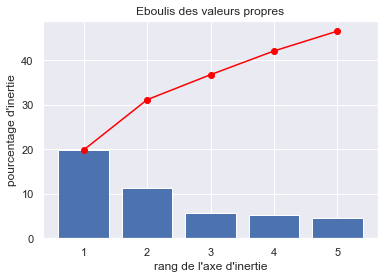

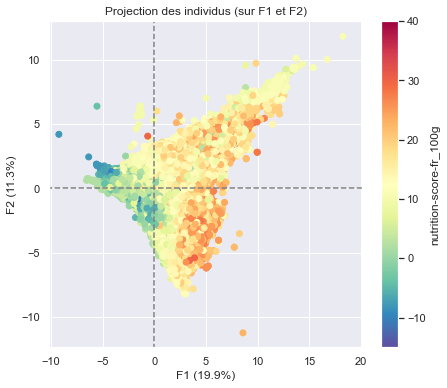

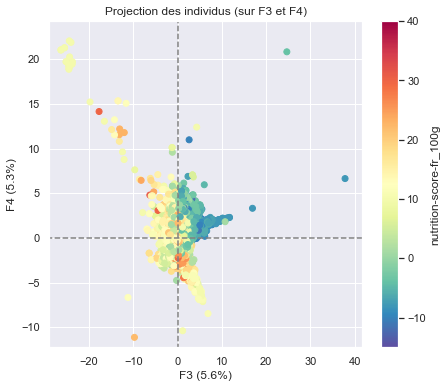

In [74]:
cols = colsOfType(df, ['float64','float32'])[:-3]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 5, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

6 cols: ['carbohydrates_100g', 'sugars_100g', 'sucrose_100g', 'fructose_100g', 'lactose_100g', 'starch_100g']


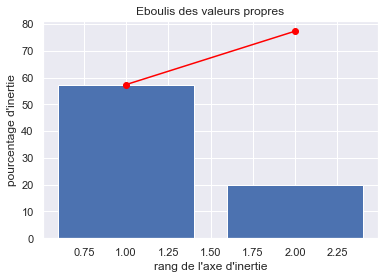

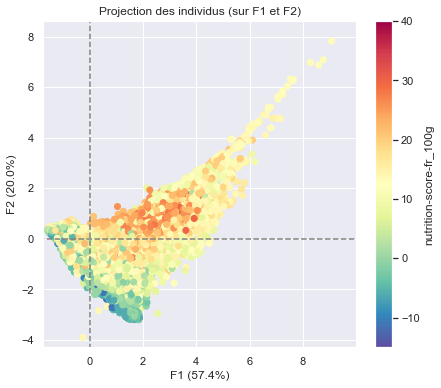

In [75]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'ose' in col or col in ['carbohydrates_100g', 'starch_100g', 'sugars_100g']]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = PCA_Compression(X, pcs, cols, 'glucids')

13 cols: ['energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'trans-fat_100g', 'pantothenic-acid_100g']


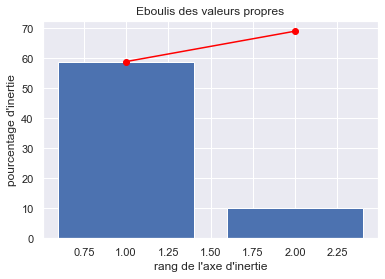

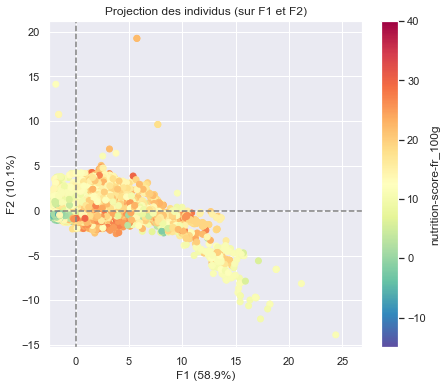

In [76]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'fat' in col or 'acid' in col]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)
compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'fatcids')], axis=1)

4 cols: ['salt_100g', 'sodium_100g', 'fluoride_100g', 'iodine_100g']


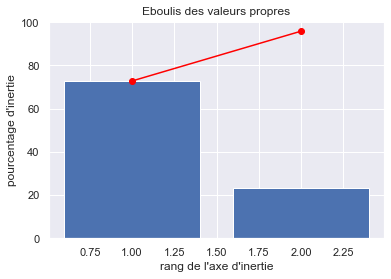

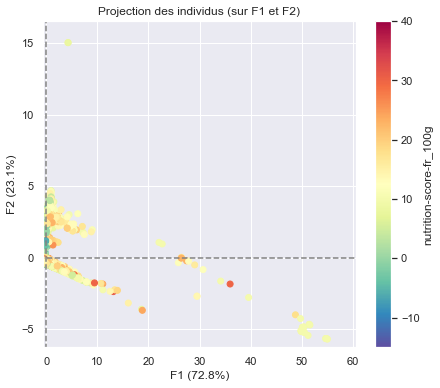

In [77]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if col in ['fluoride_100g', 'iodine_100g', 'salt_100g', 'sodium_100g']]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)
compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'salts')], axis=1)

11 cols: ['vitamin-a_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'vitamin-b12_100g']


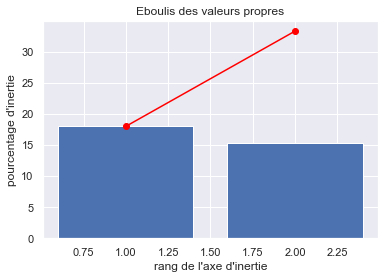

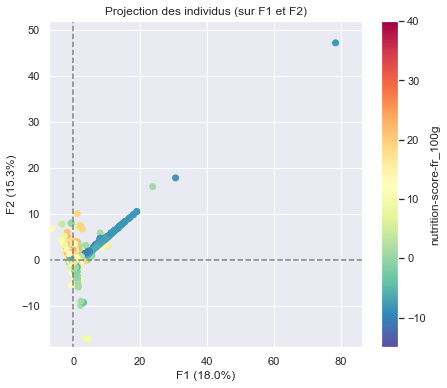

In [78]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'vitamin' in col]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'vitamins')], axis=1)

4 cols: ['potassium_100g', 'calcium_100g', 'magnesium_100g', 'selenium_100g']


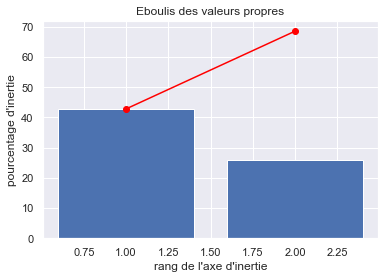

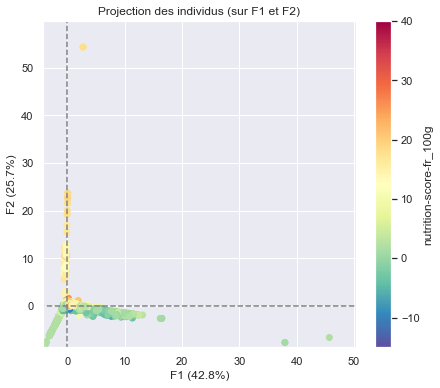

In [79]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'ium' in col and col!='sodium_100g']
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'minerals')], axis=1)

27 cols: ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'cholesterol_100g', 'carbohydrates_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'alcohol_100g', 'beta-carotene_100g', 'folates_100g', 'biotin_100g', 'silica_100g', 'bicarbonate_100g', 'chloride_100g', 'phosphorus_100g', 'iron_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'caffeine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g', 'cocoa_100g']


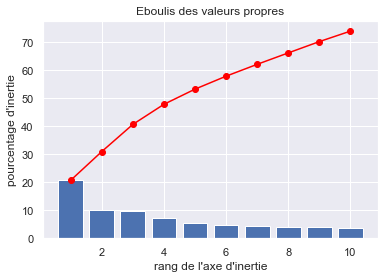

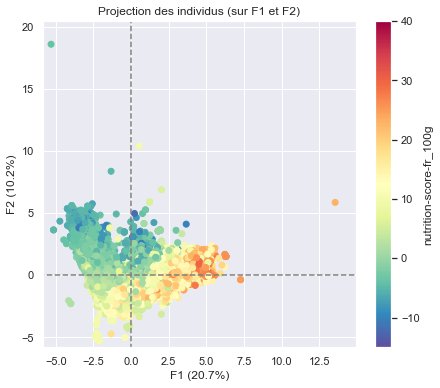

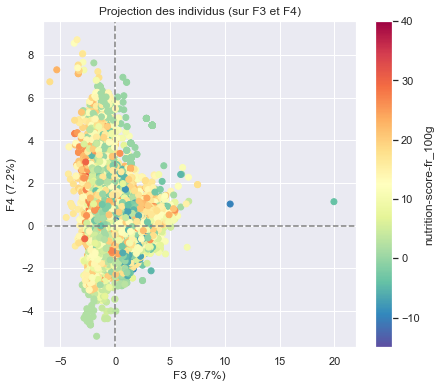

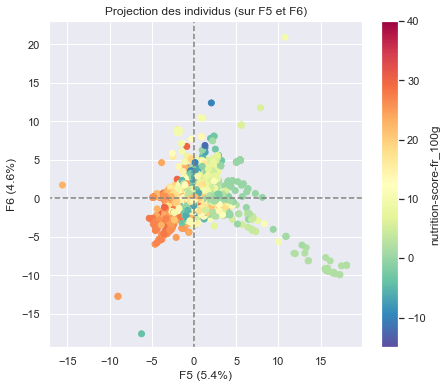

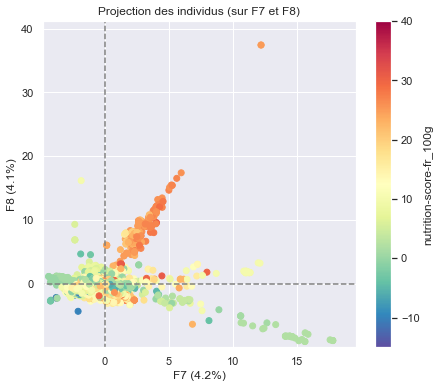

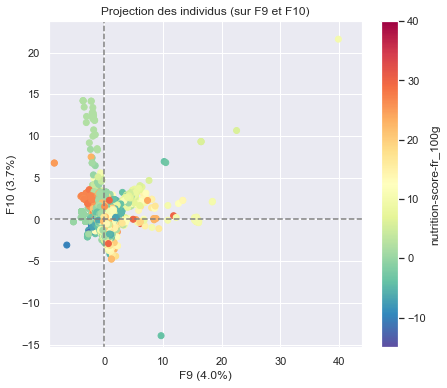

In [80]:
# Choix des colonnes à réduire
cols = colsOfType(df, ['float64','float32'])[:-3]
cols = [col for col in cols if 'fat' not in col and 'ose' not in col and 'acid' not in col and 'vitamin' not in col and 'ium' not in col and col not in ['fluoride_100g', 'iodine_100g', 'salt_100g''carbohydrates_100g', 'starch_100g', 'sugars_100g']]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 10, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols)], axis=1)

In [81]:
compressed = pd.concat([compressed, X['nutrition-score-fr_100g']], axis=1)

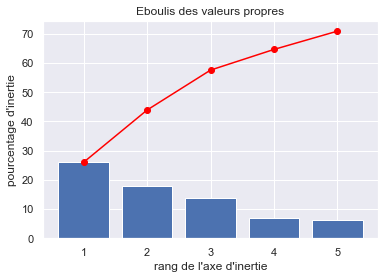

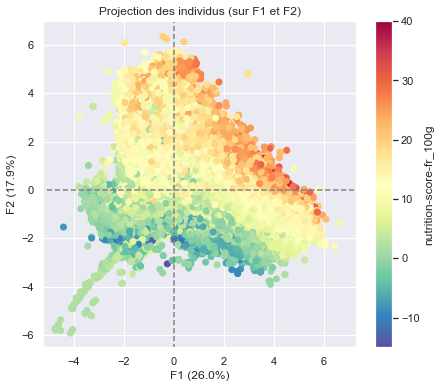

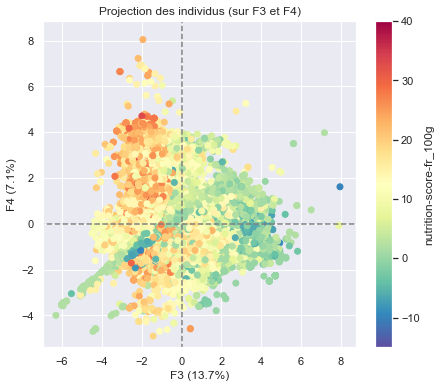

In [82]:
pcs = PCA(compressed, 5, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

In [83]:
compressed = pd.concat([PCA_Compression(X, pcs), X['nutrition-score-fr_100g']], axis=1)
compressed

,comp1,comp2,comp3,comp4,comp5,nutrition-score-fr_100g
178164,0.188368,0.232284,0.033697,-0.200591,0.156849,-2.0
259933,0.233237,0.440535,0.113154,-0.226968,0.542535,22.0
246305,0.167368,0.433016,0.000011,-0.276668,0.379882,19.0
188492,0.177111,0.239634,-0.036313,-0.144165,0.181029,6.0
260155,0.105995,0.265255,0.020059,-0.018690,0.127037,2.0
...,...,...,...,...,...,...
313972,0.225773,0.442892,0.070629,-0.331377,0.443621,21.0
233709,0.191495,0.215944,0.029923,-0.249364,0.158825,-6.0
241945,0.143938,0.417437,0.187034,-0.190156,0.233911,17.0
180300,0.339793,0.551583,0.366953,-0.372071,0.557179,22.0


In [84]:
# histo_distribution(compressed, horizontal=False)

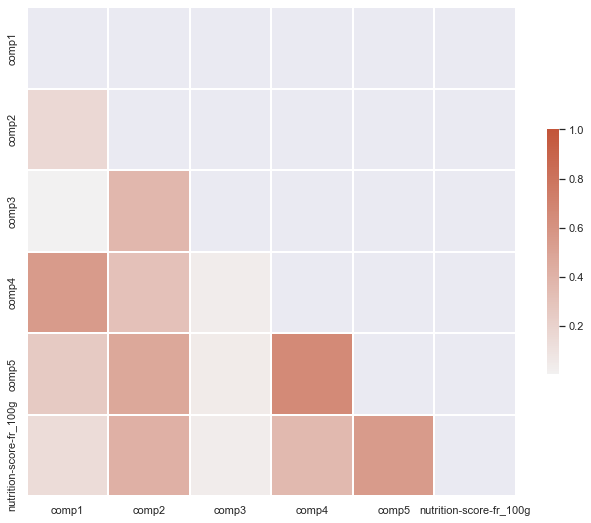

In [85]:
correlation_matrix(compressed)

## K-Means

In [86]:
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités
data = compressed
n_clust = int(len(data)*0.2)
print('Original data size:', len(data), 'nb_clusters:', n_clust)

# préparation des données pour le clustering
X = data.values
X_scaled = Std_Scaled(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km_X = km.fit(X_scaled)

centroids = km_X.cluster_centers_ 

Original data size: 28890 nb_clusters: 5778


0.9017612408502758


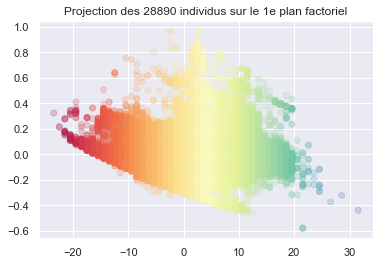

In [87]:
# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X)
print(pca.score(X))
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=X[:, -1], cmap = sns.color_palette('Spectral', as_cmap=True), alpha=.2) # c=clusters.astype(np.float)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

## K-NN

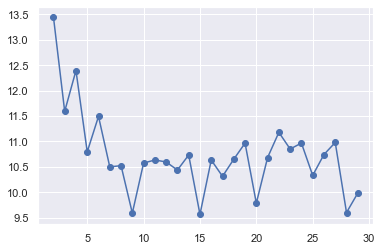

Best k=15, MSE=9.57%


In [88]:
from my_functions.knn_functions import *

data = pd.DataFrame(centroids, columns=compressed.columns)

knn_imputed_best_k, knn_imputed_min_error, knn_imputed_best_knn, knn_imputed_errors, knn_imputed_ks = best_knn(data, Y='nutrition-score-fr_100g', repeat_factor=100)
print('Best k=' + str(knn_imputed_best_k) + ', MSE=' + str(round(knn_imputed_min_error,2)) + '%')

## Comparison between the 3 imputed data KNN models

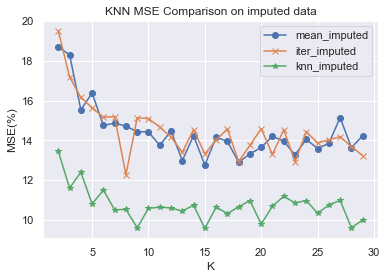

In [89]:
plt.plot(mean_imputed_ks, mean_imputed_errors, 'o-', label='mean_imputed')
plt.plot(iter_imputed_ks, iter_imputed_errors, 'x-', label='iter_imputed')
plt.plot(knn_imputed_ks, knn_imputed_errors, '*-', label='knn_imputed')
plt.legend()
plt.title('KNN MSE Comparison on imputed data')
plt.xlabel('K')
plt.ylabel('MSE(%)')
plt.show()

# HC

In [90]:
from scipy.cluster.hierarchy import linkage, fcluster

# préparation des données pour le clustering
sampled_data = knn_imputed_data
X = sampled_data.values
names = sampled_data.index

# Centrage et Réduction
X_scaled = Std_Scaled(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

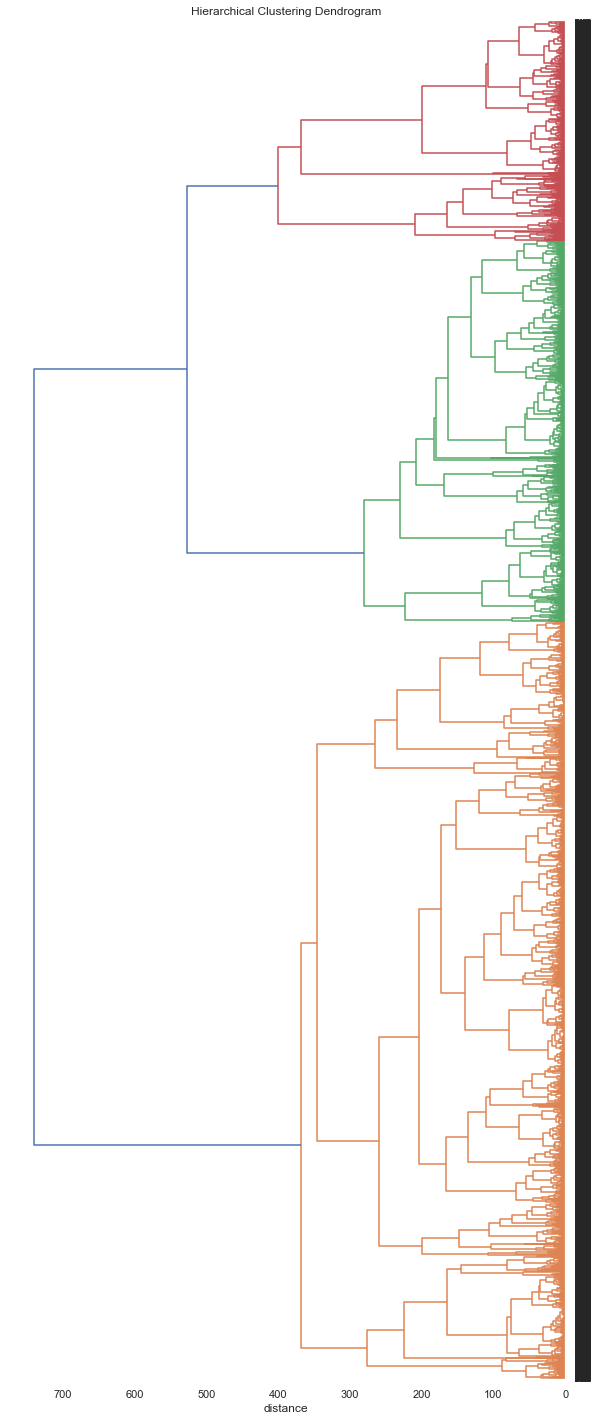

In [91]:
from my_functions.machine_learning_common_functions import plot_dendrogram

# Affichage du dendrogramme
plot_dendrogram(Z, names)

In [92]:
clusters = fcluster(Z, 5, criterion='maxclust')

In [93]:
category = [df.loc[id, working_category] for id in sampled_data.index]

nutri_score = [df.loc[id, 'nutrition-score-fr_100g'] for id in sampled_data.index]


hc = pd.DataFrame({'category': category, 'nutri_score': nutri_score, 'cluster': clusters, 'product': names})
hc

,category,nutri_score,cluster,product
0,pains de mie complet,-2.0,1,178164
1,complements alimentaires,22.0,3,259933
2,pâtes à tarte,19.0,2,246305
3,dessert,6.0,1,188492
4,fromage,2.0,1,260155
...,...,...,...,...
28885,chips et frites,21.0,2,313972
28886,pâtes alimentaires,-6.0,1,233709
28887,terrine,17.0,5,241945
28888,fruits à coques,22.0,3,180300


In [94]:
Col = 'nutri_score'
pt=hc.pivot_table(Col, columns='cluster', index='category',  aggfunc='count', fill_value=0)
pt

cluster,1,2,3,4,5
category,,,,,
100,1,0,0,0,0
a,2,1,0,0,3
acras,1,0,0,0,0
additifs alimentaires,5,3,0,0,0
aides,2,2,0,0,0
...,...,...,...,...,...
zupa,2,0,0,0,0
śmietana,1,0,0,0,0
άμυλο,1,0,0,0,0


In [95]:
pt.sort_values(by=1, ascending=False).head(10)

cluster,1,2,3,4,5
category,,,,,
conserve,919,4,13,0,34
boisson,879,156,0,1,17
plats prepares,804,26,4,2,68
aliments et boissons à base de vegetaux,736,230,42,0,23
surgeles,730,45,0,0,46
epicerie,610,46,179,5,238
pâtes alimentaires,608,46,1,0,5
dessert,593,94,1,0,8
plats à base de viande,524,6,1,0,25


In [96]:
pt.sort_values(by=2, ascending=False).head(10)

cluster,1,2,3,4,5
category,,,,,
chocolat,32,1118,18,0,2
biscuit,50,898,1,0,0
snacks sucres,93,639,7,0,3
petit,251,573,1,0,4
gâteaux,46,496,2,0,1
chips et frites,90,436,8,0,2
bonbon,35,383,1,0,0
snacks sales,37,356,11,0,3
pain,423,290,0,0,0


In [97]:
pt.sort_values(by=3, ascending=False).head(10)

cluster,1,2,3,4,5
category,,,,,
beurre,2,0,230,0,3
fruits à coques,11,31,216,0,1
epicerie,610,46,179,5,238
huile,3,0,122,0,0
produits à tartiner sales,152,7,94,0,222
produits à tartiner,59,22,92,0,40
huiles d'olive,0,0,87,0,0
poissons et viandes et oeufs,9,4,70,0,3
aliments et boissons à base de vegetaux,736,230,42,0,23


In [98]:
pt.sort_values(by=4, ascending=False).head(10)

cluster,1,2,3,4,5
category,,,,,
sel,1,0,0,23,0
epicerie,610,46,179,5,238
epices,40,22,1,3,1
plats prepares,804,26,4,2,68
condiment,161,12,5,2,47
produits de la mer,100,1,11,1,7
cookies,15,154,0,1,0
boisson,879,156,0,1,17
100,1,0,0,0,0


In [99]:
pt.sort_values(by=5, ascending=False).head(10)

cluster,1,2,3,4,5
category,,,,,
fromage,171,17,1,0,452
epicerie,610,46,179,5,238
fromages de vache,12,3,2,0,226
produits à tartiner sales,152,7,94,0,222
fromages de france,3,9,0,0,218
saucisse,19,4,0,0,172
saucisson,5,1,2,0,154
emmental,0,0,0,0,96
charcuterie,15,0,2,0,95
